In [1]:
#libraries Imported
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from datetime import datetime
import re
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#accquiring data
netflix_ds = pd.read_csv('/content/netflix_titles.csv')
netflix_ds1=netflix_ds

In [3]:
#analyze data columns
print(netflix_ds.columns.values)

['show_id' 'type' 'title' 'director' 'cast' 'country' 'date_added'
 'release_year' 'rating' 'duration' 'listed_in' 'description']


In [4]:
netflix_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [5]:
# preview the data from the start
netflix_ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# preview the data from the end
netflix_ds.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
#datatype of columns
netflix_ds1=netflix_ds
netflix_ds.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
________________________________________


In [8]:
netflix_ds.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [9]:
netflix_ds.describe(include=['O'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


In [10]:
d2=netflix_ds[(netflix_ds['type']=='Movie')]
d2.describe(include=['O'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,5377,5377,5377,5214,4951,5147,5377,5372,5377,5377,5377
unique,5377,1,5377,3909,4780,590,1350,14,201,265,5363
top,s2,Movie,7:19,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",TV-MA,90 min,Documentaries,A surly septuagenarian gets another chance at ...
freq,1,5377,1,18,10,1850,105,1845,136,334,3


In [11]:
#conversion of a type column into numerical data
title_mapping = {"TV Show": 1, "Movie": 0}
netflix_ds['type'] = netflix_ds['type'].map(title_mapping)
netflix_ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
#conversion of a Duration into numerical data
netflix_ds['duration'] = netflix_ds.duration.str.extract('([0-9]+)', expand=False)
netflix_ds['duration'] = pd.to_numeric(netflix_ds['duration'])
netflix_ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...


In [13]:
#conversion of a Show Id into numerical data
netflix_ds['show_id'] = netflix_ds.show_id.str.extract('([0-9]+)', expand=False)
netflix_ds['show_id'] = pd.to_numeric(netflix_ds['show_id'])
netflix_ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...


In [14]:
#conversion of a rating column into numerical data
netflix_ds['rating'] = netflix_ds['rating'].astype(str)
r = {'TV-MA':1, 'R': 2,  'PG-13':3, 'TV-14':4, 'TV-PG':5 ,'NR':6 ,'TV-G':7 ,'TV-Y':8 , 'TV-Y7':9, 'PG':10, 'G':11, 'NC-17': 12,  'TV-Y7-FV' :13, 'UR':14}
netflix_ds['rating'] = netflix_ds['rating'].map(r)
netflix_ds['rating'] = netflix_ds['rating'].fillna(1)
netflix_ds['rating'] = netflix_ds['rating'].astype(int)
netflix_ds.head()
netflix_ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,1,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,1,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,2,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,3,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,3,123,Dramas,A brilliant group of students become card-coun...


In [15]:
#conversion of a date added into numerical data
netflix_ds['date_added'] = pd.to_datetime(netflix_ds['date_added'], errors= "coerce")
dateTimeObj = datetime.now()
netflix_ds['date_added'] = pd.DatetimeIndex(netflix_ds['date_added']).year
df=netflix_ds['date_added'].value_counts().idxmax()
print(netflix_ds.date_added.describe())
netflix_ds['date_added'] = netflix_ds['date_added'].fillna(2019)
netflix_ds['date_added'] = netflix_ds['date_added'].astype(int)
netflix_ds.head()

count    7777.000000
mean     2018.493378
std         1.388144
min      2008.000000
25%      2018.000000
50%      2019.000000
75%      2020.000000
max      2021.000000
Name: date_added, dtype: float64


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,2020,1,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,2016,1,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,2,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,3,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,3,123,Dramas,A brilliant group of students become card-coun...


In [16]:
#Extraction of genre added from Listed in column
netflix_ds['genre']=netflix_ds.listed_in.str.extract(r'(Horror|Action & Adventure|Sci-Fi & Fantasy|Romantic|Comedies|Dramas|Sports|Trillers|Classic|cult|Children & Family|Science & Nature|Music)', expand=False)
g={"Horror": 1,"Action & Adventure": 2,"Sci-Fi & Fantasy": 3, "Romantic": 4, "Comedies": 5, "Dramas": 6, "Sports": 7, "Trillers": 8, "Classic": 9, "cult": 10, "Children & Family": 11, "Science & Nature": 12}
#Extraction of genre added into numerical data
netflix_ds['genre'] = netflix_ds['genre'].map(g)
netflix_ds['genre'] = netflix_ds['genre'].fillna(0)
netflix_ds['genre'] = netflix_ds['genre'].astype(int)
pd.crosstab(netflix_ds['genre'], netflix_ds['type'])
netflix_ds[["genre", "type"]].groupby(['genre'], as_index=False).mean().sort_values(by='type', ascending=False)

,genre,type
10,12,1.000000
4,4,0.922438
0,0,0.440243
5,5,0.270876
8,9,0.259615
6,6,0.245519
2,2,0.158693
3,3,0.125000
1,1,0.109155
7,7,0.000000


In [17]:
#Group Country in Continent
#conversion of a country into numerical data
con=netflix_ds.country.unique()
asia=['Russian', 'China', 'India', 'Kazakhstan','Saudi Arabia', 'Iran', 'Mongolia', 'Indonesia',  'Pakistan',  'Turkey',  'Myanmar',  'Afghanistan',  'Yemen',  'Thailand', 'Turkmenistan', 'Uzbekistan', 'Iraq', 'Japan', 'Vietnam','Malaysia' ,'Oman', 'Philippines','Laos', 'Kyrgyzstan', 'Nepal','Tajikistan','North Korea',' South Korea', 'Jordan', 'Azerbaijan','syria', 'combodia' ,'Bangladash', 'United Arab Emirates','Georgia', 'Sri Lanka', 'Bhutan', 'Taiwan', 'Armenia', 'Israel kuwait', 'Timor-Leste', 'Qatar', 'Lebanon','Cyprus', 'Palestine','Brunei','Bahrain','Singapore', 'Maldives']
europe=['Germany','United Kingdom','France','Italy','Spain','Ukraine','Poland','Romania','Netherlands','Belgium','Czech Republic','Greece','Portugal','Sweden','Hungary','Belarus','Austria','Serbia','Switzerland','Bulgaria','Denmark','Finland','Slovakia','Norway','Ireland','Croatia','Moldova','Bosnia','Albania','Lithuania','North Macedonia','Slovenia','Latvia','Estonia','Montenegro','Luxembourg','Malta','Iceland','ndorra','Monaco','Liechtenstein','San Marino','Holy See']
Africa=['Ethiopia', 'Nigeria','Egypt','DR Congo','Tanzania','South Africa','Kenya','Uganda','Algeria','Sudan','Morocco','Angola','Mozambique','Ghana','Madagascar','Cameroon','Côte dIvoire','Niger','Burkina Faso','Mali','Malawi','Zambia','Senegal','Chad','Somalia','Zimbabwe','Guinea','Rwanda','Benin','Burundi','Tunisia','South Sudan','Togo','Sierra Leone','Libya','Congo','Liberia','Central African Republic','Mauritania','Eritrea','Namibia','Gambia','Botswana','Gabon','Lesotho','Guinea-Bissau','Equatorial Guinea','Mauritius','Eswatini','Djibouti','Co','Cabo Verde','Sao Tome','Seychelles']
Australia=['Micronesia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa','Solomon Islands', 'Tonga', 'Tuvalu','Vanuatu']
America=['Anguilla','United Kingdom','Barbuda','Argentina','Aruba','Netherlands','Bahamas','Barbados','Belize','Bermuda','Bolivia','Bonaire','Norway','Brazil','British Virgin Islands','Canada','Cayman Islands','Chile','Clipperton Island','Colombia','Costa Rica','Cuba','Curaçao','Dominica','Dominican Republic','Ecuador','El Salvador','Falkland Islands','French Guiana' ,'Greenland','Denmark','Grenada','Guadeloupe','Guatemala','Guyana','Haiti','Honduras','Jamaica','Martinique','Mexico','Montserrat','Navassa Island','United States','Nicaragua','Panama','Paraguay','Peru','Puerto Rico','Saba','Saint Barthélemy','Saint Kitts','Saint Lucia','Saint Martin','Saint Pierre','Saint Vincent','Sint Eustatius','Sint Maarten', 'South Georgia','South Sandwich Islands','Suriname','Trinidad','Tobago','Turks','Caicos Islands','Virgin Islands','United States of America','Uruguay','Venezuela']
netflix_ds['continenta']=netflix_ds.country.str.contains(r'(Russian|China|India|Kazakhstan|Saudi Arabia|Iran|Mongolia|Indonesia|Pakistan|Turkey|Myanmar|Afghanistan|Yemen|Thailand|Turkmenistan|Uzbekistan|Iraq|Japan|Vietnam|Malaysia|Oman|Philippines|Laos|Kyrgyzstan|Nepal|Tajikistan|North Korea|South Korea|Jordan|Azerbaijan|syria|combodia|Bangladash|United Arab Emirates|Georgia|Sri Lanka|Bhutan|Taiwan|Armenia|Israel|kuwait|Timor-Leste|Qatar|Lebanon|Cyprus|Palestine|Brunei|Bahrain|Singapore|Maldives)')
netflix_ds.loc[netflix_ds.continenta == True, "continenta"] = "Asia"
netflix_ds['continente']=netflix_ds.country.str.contains(r'(Germany|United Kingdom|France|Italy|Spain|Ukraine|Poland|Romania|Netherlands|Belgium|Czech Republic|Greece|Portugal|Sweden|Hungary|Belarus|Austria|Serbia|Switzerland|Bulgaria|Denmark|Finland|Slovakia|Norway|Ireland|Croatia|Moldova|Bosnia|Albania|Lithuania|North Macedonia|Slovenia|Latvia|Estonia|Montenegro|Luxembourg|Malta|Iceland|ndorra|Monaco|Liechtenstein|San Marino|Holy See)')
netflix_ds.loc[netflix_ds.continente == True, "continente"] = "Europe"
netflix_ds['continentaf']=netflix_ds.country.str.contains(r'(Ethiopia| Nigeria|Egypt|DR Congo|Tanzania|South Africa|Kenya|Uganda|Algeria|Sudan|Morocco|Angola|Mozambique|Ghana|Madagascar|Cameroon|Côte dIvoire|Niger|Burkina Faso|Mali|Malawi|Zambia|Senegal|Chad|Somalia|Zimbabwe|Guinea|Rwanda|Benin|Burundi|Tunisia|South Sudan|Togo|Sierra Leone|Libya|Congo|Liberia|Central African Republic|Mauritania|Eritrea|Namibia|Gambia|Botswana|Gabon|Lesotho|Guinea-Bissau|Equatorial Guinea|Mauritius|Eswatini|Djibouti|Co|Cabo Verde|Sao Tome|Seychelles)')
netflix_ds.loc[netflix_ds.continentaf == True, "continentaf"] = "Africa"
netflix_ds['continentau']=netflix_ds.country.str.contains(r'(Micronesia| Fiji|Kiribati|Marshall Islands|Nauru|New Zealand|Palau|Papua New Guinea|Samoa|Solomon Islands|Tonga|Tuvalu|Vanuatu)')
netflix_ds.loc[netflix_ds.continentau == True, "continentau"] = "Australia"
netflix_ds['continentam']=netflix_ds.country.str.contains(r'(Anguilla|United Kingdom|Barbuda|Argentina|Aruba|Netherlands|Bahamas|Barbados|Belize|Bermuda|Bolivia|Bonaire|Norway|Brazil|British Virgin Islands|Canada|Cayman Islands|Chile|Clipperton Island|Colombia|Costa Rica|Cuba|Curaçao|Dominica|Dominican Republic|Ecuador|El Salvador|Falkland Islands|French Guiana |Greenland|Denmark|Grenada|Guadeloupe|Guatemala|Guyana|Haiti|Honduras|Jamaica|Martinique|Mexico|Montserrat|Navassa Island|United States|Nicaragua|Panama|Paraguay|Peru|Puerto Rico|Saba|Saint Barthélemy|Saint Kitts|Saint Lucia|Saint Martin|Saint Pierre|Saint Vincent|Sint Eustatius|Sint Maarten| South Georgia|South Sandwich Islands|Suriname|Trinidad|Tobago|Turks|Caicos Islands|Virgin Islands|United States of America|Uruguay|Venezuela)')
netflix_ds.loc[netflix_ds.continentam == True, "continentam"] = "America"
#conversion of a rating column into numerical data
#conversion of a rating column into numerical data
contin = {'Asia':1, 'Europe': 2,  'Africa':3, 'Australia':4, 'America':5}
netflix_ds['continenta'] = netflix_ds['continenta'].map(contin)
netflix_ds['continente'] = netflix_ds['continente'].map(contin)
netflix_ds['continentaf'] = netflix_ds['continentaf'].map(contin)
netflix_ds['continentau'] = netflix_ds['continentau'].map(contin)
netflix_ds['continentam'] = netflix_ds['continentam'].map(contin)
netflix_ds['continenta'] = netflix_ds['continenta'].fillna(0)
netflix_ds['continente'] = netflix_ds['continente'].fillna(0)
netflix_ds['continentaf'] = netflix_ds['continentaf'].fillna(0)
netflix_ds['continentau'] = netflix_ds['continentau'].fillna(0)
netflix_ds['continentam'] = netflix_ds['continentam'].fillna(0)
netflix_ds['continent'] = netflix_ds['continenta']+netflix_ds['continente']+netflix_ds['continentaf']+netflix_ds['continentau']+netflix_ds['continentam']
netflix_ds['continent'] = netflix_ds['continent'].astype(int)
netflix_ds.loc[(netflix_ds.continent>5),'continent']=5
netflix_ds['continent'] = netflix_ds['continenta']+netflix_ds['continente']+netflix_ds['continentaf']+netflix_ds['continentau']+netflix_ds['continentam']
netflix_ds['continent'] = netflix_ds['continent'].astype(int)
netflix_ds.loc[(netflix_ds.continent>5),'continent']=5
netflix_ds = netflix_ds.drop(['continenta','continente','continentaf', 'continentau', 'continentam'], axis=1)
netflix_ds.head(10)

<ipython-input-17-4a2e070c49ad>:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  netflix_ds['continenta']=netflix_ds.country.str.contains(r'(Russian|China|India|Kazakhstan|Saudi Arabia|Iran|Mongolia|Indonesia|Pakistan|Turkey|Myanmar|Afghanistan|Yemen|Thailand|Turkmenistan|Uzbekistan|Iraq|Japan|Vietnam|Malaysia|Oman|Philippines|Laos|Kyrgyzstan|Nepal|Tajikistan|North Korea|South Korea|Jordan|Azerbaijan|syria|combodia|Bangladash|United Arab Emirates|Georgia|Sri Lanka|Bhutan|Taiwan|Armenia|Israel|kuwait|Timor-Leste|Qatar|Lebanon|Cyprus|Palestine|Brunei|Bahrain|Singapore|Maldives)')
<ipython-input-17-4a2e070c49ad>:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  netflix_ds['continente']=netflix_ds.country.str.contains(r'(Germany|United Kingdom|France|Italy|Spain|Ukraine|Poland|Romania|Netherlands|Belgium|Czech Repu

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,continent
0,1,1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,2020,1,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,6,5
1,2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,2016,1,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,6,5
2,3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018,2011,2,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,1
3,4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017,2009,3,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2,5
4,5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020,2008,3,123,Dramas,A brilliant group of students become card-coun...,6,5
5,6,1,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017,2016,1,1,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,6,1
6,7,0,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020,2019,1,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",1,3
7,8,0,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019,1997,2,119,Dramas,After one of his high school students attacks ...,6,5
8,9,0,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019,2019,4,118,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",1,1
9,10,0,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017,2008,1,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,1,1


In [18]:
#Pivot date _added
netflix_ds[['date_added', 'type']].groupby(['date_added'], as_index=False).mean().sort_values(by='type', ascending=False)

,date_added,type
0,2008,0.500000
5,2013,0.454545
8,2016,0.417607
12,2020,0.346939
7,2015,0.340909
11,2019,0.307906
9,2017,0.294694
10,2018,0.255193
13,2021,0.247863
6,2014,0.240000


In [19]:
#Pivot Release year
netflix_ds[['release_year', 'type']].groupby(['release_year'], as_index=False).mean().sort_values(by='type', ascending=False)

,release_year,type
0,1925,1.000000
72,2021,0.612903
71,2020,0.526498
5,1946,0.500000
14,1963,0.500000
...,...,...
34,1983,0.000000
35,1984,0.000000
1,1942,0.000000
3,1944,0.000000


In [20]:
#Pivot Continent
netflix_ds[['continent', 'type']].groupby(['continent'], as_index=False).mean().sort_values(by='type', ascending=False)

,continent,type
0,0,0.514243
2,2,0.321637
1,1,0.299128
5,5,0.291619
4,4,0.285714
3,3,0.128631


In [21]:
#pivot Rating
netflix_ds[['rating', 'type']].groupby(['rating'], as_index=False).mean().sort_values(by='type', ascending=False)

,rating,type
8,9,0.649446
7,8,0.582143
6,7,0.427835
4,5,0.373449
0,1,0.355401
3,4,0.341274
12,13,0.166667
5,6,0.059524
1,2,0.003008
2,3,0.000000


In [22]:
#Pivot Genre
netflix_ds[['genre', 'type']].groupby(['genre'], as_index=False).mean().sort_values(by='type', ascending=False)

,genre,type
10,12,1.000000
4,4,0.922438
0,0,0.440243
5,5,0.270876
8,9,0.259615
6,6,0.245519
2,2,0.158693
3,3,0.125000
1,1,0.109155
7,7,0.000000


In [23]:
#pivot Duration
netflix_ds[['genre', 'type']].groupby(['genre'], as_index=False).mean().sort_values(by='type', ascending=False)

,genre,type
10,12,1.000000
4,4,0.922438
0,0,0.440243
5,5,0.270876
8,9,0.259615
6,6,0.245519
2,2,0.158693
3,3,0.125000
1,1,0.109155
7,7,0.000000


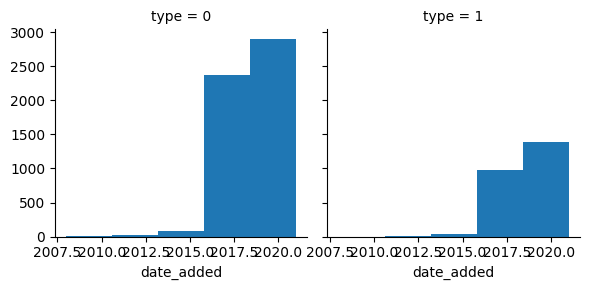

In [24]:
#Correlating numerical features: type (Tv show or movie) and date added on Netflix
h2 = sns.FacetGrid(netflix_ds, col='type')
h2.map(plt.hist, 'date_added', bins=5)

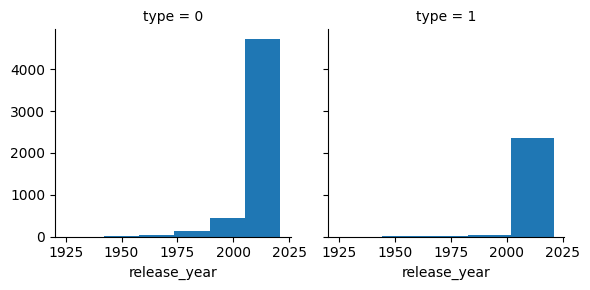

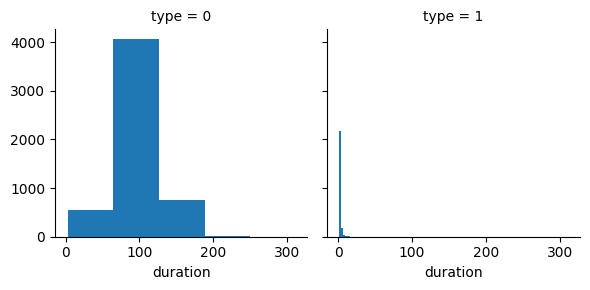

In [25]:
#Correlating numerical features: type (Tv show or movie) and release year on Netflix
h2 = sns.FacetGrid(netflix_ds, col='type')
h2.map(plt.hist, 'release_year', bins=5)
h2 = sns.FacetGrid(netflix_ds, col='type')
h2.map(plt.hist, 'duration', bins=5)

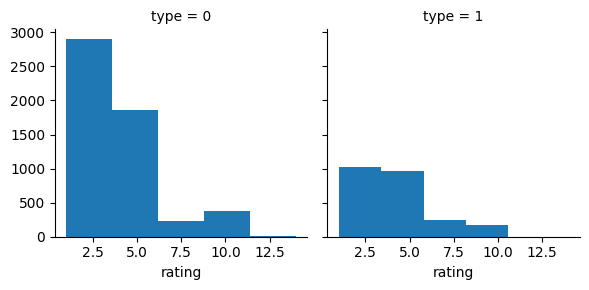

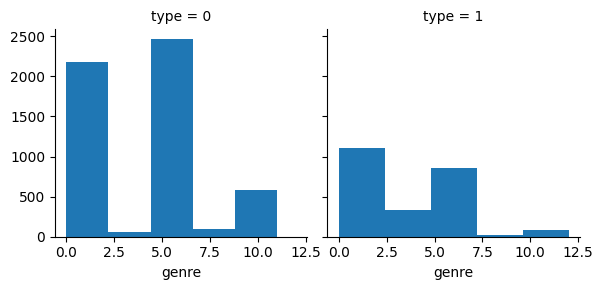

In [26]:
#Correlating numerical features: type (Tv show or movie) and Rating and genre on Netflix
h2 = sns.FacetGrid(netflix_ds, col='type')
h2.map(plt.hist, 'rating', bins=5)
h2 = sns.FacetGrid(netflix_ds, col='type')
h2.map(plt.hist, 'genre', bins=5)

In [27]:
#Dropping Of Unwanted Columns
print("Before", netflix_ds.shape)
netflix_ds = netflix_ds.drop(['title','country','cast','director', 'listed_in', 'description'], axis=1)
"After", netflix_ds.shape

Before (7787, 14)


('After', (7787, 8))

In [28]:
#After complete conversion into numerical data
netflix_ds.head()

,show_id,type,date_added,release_year,rating,duration,genre,continent
0,1,1,2020,2020,1,4,6,5
1,2,0,2016,2016,1,93,6,5
2,3,0,2018,2011,2,78,1,1
3,4,0,2017,2009,3,80,2,5
4,5,0,2020,2008,3,123,6,5


In [29]:
#divide data into train and test
#model Data:
feature_cols = ['continent', 'date_added','release_year', 'rating','duration','genre']
X = netflix_ds[feature_cols] # Features
y = netflix_ds.type # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)# Logistic Regression
X_train.shape, y_train.shape, X_test.shape

((5840, 6), (5840,), (1947, 6))

In [30]:
#Logistic Regression Algorithm
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(acc_log)

99.85


In [31]:
#corelation b?w columns
coeff_df = pd.DataFrame(netflix_ds.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=True)

,Feature,Correlation
4,duration,-0.725243
3,rating,-0.411422
5,genre,-0.085258
2,release_year,-0.027166
1,date_added,0.032422
0,type,0.276382
6,continent,NaN


In [32]:
#svc algorithm:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print(acc_svc)

97.76


In [33]:
#KNN algorithm:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(acc_knn)

99.9


In [34]:
#Naive Bayes algorithm:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(acc_gaussian)

99.35


In [35]:
#Preceptron algorithm:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print(acc_perceptron)

95.89


In [36]:
#linear svc algorithm:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


99.79

In [37]:
#sgd algorithm:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

97.95

In [38]:
#decision Tree algorithm:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(acc_decision_tree)

100.0


In [39]:
#Random Forest algorithm:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest)

100.0


In [41]:
#model Evaluation
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
1,KNN,99.90
2,Logistic Regression,99.85
7,Linear SVC,99.79
4,Naive Bayes,99.35
6,Stochastic Gradient Decent,97.95
0,Support Vector Machines,97.76
5,Perceptron,95.89


In [42]:
#Model submission
submission = pd.DataFrame({
        "type": Y_pred
    })
submission.sort_values(by='type', ascending=False)

,type
1946,1
638,1
1506,1
644,1
1501,1
...,...
773,0
770,0
769,0
768,0
